## Importing datasets

In [ ]:
import pandas as pd

In [ ]:
normal_data=pd.read_csv("/content/Normal_data.csv")

In [ ]:
zeros_list = [0] * 68424

In [ ]:
normal_data['target'] = zeros_list

ValueError: Length of values (68424) does not match length of index (42583)

In [ ]:
normal_data.head()

In [ ]:
ovs_data=pd.read_csv("/content/OVS.csv")

In [ ]:
one_list = [1] * 138722

In [ ]:
ovs_data['target'] = one_list

In [ ]:
ovs_data.head()

In [ ]:
metasploitable=pd.read_csv("/content/metasploitable-2.csv")

In [ ]:
one_list = [1] * 136743

In [ ]:
metasploitable['target'] = one_list

In [ ]:
metasploitable.head()

In [ ]:
merged_df = pd.concat([normal_data, ovs_data, metasploitable], axis=0)

merged_df.head()

In [ ]:
merged_df.drop('Label',axis=1,inplace = True)

In [ ]:
merged_df.head()

In [ ]:
merged_df.tail()

In [ ]:
merged_df.to_csv('Dataset.csv', index=False)

## DNN

### Data preprocessing

In [ ]:
import pandas as pd

In [ ]:
merged_df=pd.read_csv("/content/Dataset.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

columns = ['Flow ID','Src IP','Dst IP','Timestamp']

# Apply Label Encoding
for column in columns:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

merged_df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,target
0,33857,49931,443,344,53648,6,909,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,33858,55004,53650,280,443,6,909,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,65303,55004,35108,346,53,6,909,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,65303,55006,53,344,35108,6,909,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,15848,55004,60900,209,443,6,909,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
features = merged_df.drop('target', axis=1)
labels = merged_df['target']

In [ ]:
features.shape

(343889, 83)

### Importing necessary liberaries

In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Loading and splitting the dataset

In [ ]:
# Assume you have your dataset loaded as X (features) and y (labels)
# X should be an array with 83 features, and y should be binary labels (0 for normal, 1 for attack)
# Load your data here
x,y = features,labels # This is a placeholder

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Build the DNN model
model = Sequential()

# Input layer (83 input features)
model.add(Dense(128, input_dim=83, activation='relu'))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # Dropout to prevent overfitting
model.add(Dense(128, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the dataset

In [ ]:
# Train the model
history = model.fit(X_train, y_train,epochs=30,batch_size=128,validation_data=(X_test, y_test))

Epoch 1/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9238 - loss: 10479.5742 - val_accuracy: 0.9904 - val_loss: 1716.2927
Epoch 2/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.9830 - loss: 2145.6162 - val_accuracy: 0.9953 - val_loss: 626.1740
Epoch 3/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9902 - loss: 1094.5188 - val_accuracy: 0.9960 - val_loss: 453.0787
Epoch 4/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9927 - loss: 697.8293 - val_accuracy: 0.9966 - val_loss: 395.5997
Epoch 5/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9942 - loss: 450.2773 - val_accuracy: 0.9968 - val_loss: 273.2761
Epoch 6/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9953 - loss: 357.4839 - val_accuracy: 0.9977 - val_loss: 206.2186
Epoch 7/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9956 - loss: 346.6012 - val_accuracy: 0.9976 - val_loss: 243.5282
Epoch 8/30
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict the test set results and generate the classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate a classification report
print(classification_report(y_test, y_pred))

2150/2150 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 9.8838
Test accuracy: 0.9966123104095459
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13677
           1       1.00      1.00      1.00     55101

    accuracy                           1.00     68778
   macro avg       0.99      1.00      0.99     68778
weighted avg       1.00      1.00      1.00     68778



Testing accuracy

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict the test set results and generate the classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate a classification report
print(classification_report(y_test, y_pred))

2150/2150 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9967 - loss: 9.8838
Test accuracy: 0.9966123104095459
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13677
           1       1.00      1.00      1.00     55101

    accuracy                           1.00     68778
   macro avg       0.99      1.00      0.99     68778
weighted avg       1.00      1.00      1.00     68778



## Graphs and plotting

In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()  # Convert to DataFrame for easy plotting

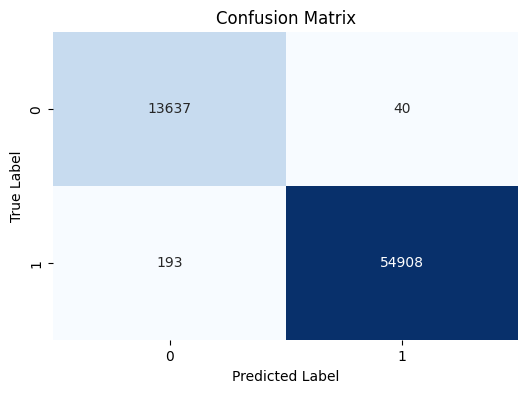

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

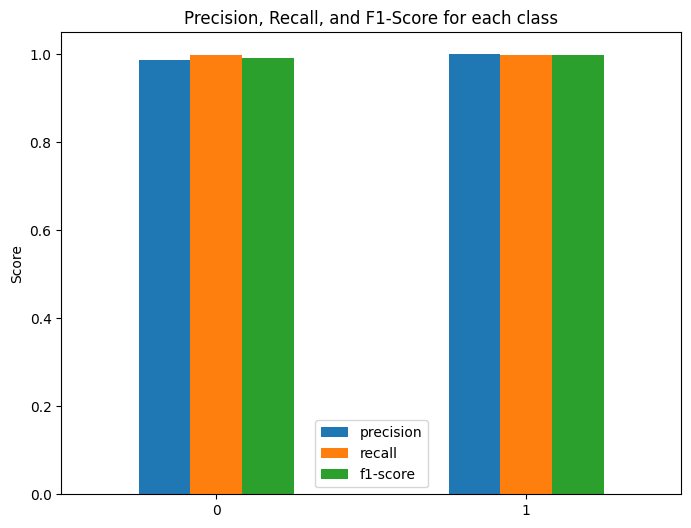

In [ ]:
# Plot Precision, Recall, F1-score for each class
metrics = ['precision', 'recall', 'f1-score']

# Plot a bar graph for precision, recall, and f1-score
report_df = report_df.loc[['0', '1'], metrics]  # Filter out support and accuracy
report_df.plot(kind="bar", figsize=(8,6))
plt.title("Precision, Recall, and F1-Score for each class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

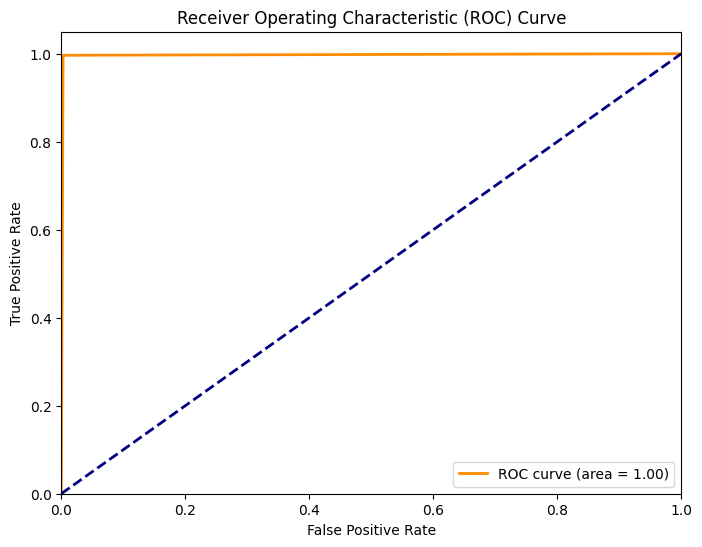

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Regenerate the classification report with 'output_dict=True'
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)


              precision    recall  f1-score       support
0              0.986045  0.997075  0.991529  13677.000000
1              0.999272  0.996497  0.997883  55101.000000
accuracy       0.996612  0.996612  0.996612      0.996612
macro avg      0.992658  0.996786  0.994706  68778.000000
weighted avg   0.996642  0.996612  0.996619  68778.000000


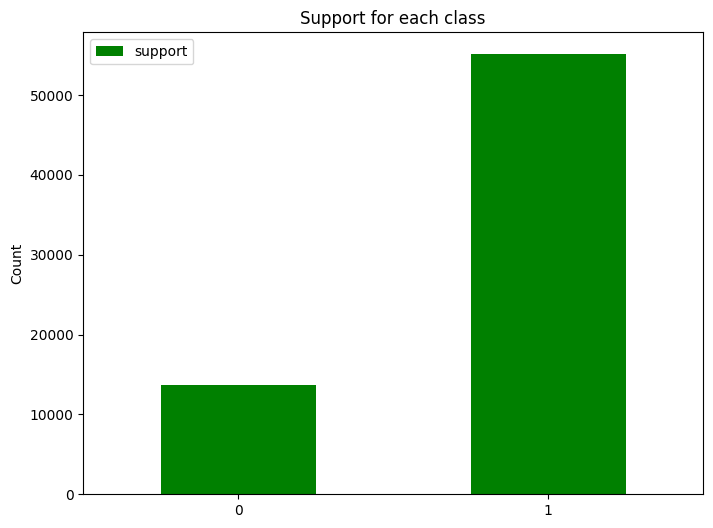

In [ ]:
# Plot the accuracy and support for each class
report_df_acc_sup = report_df.loc[['0', '1'], ['support']]
report_df_acc_sup.plot(kind="bar", figsize=(8,6), color='green')
plt.title("Support for each class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

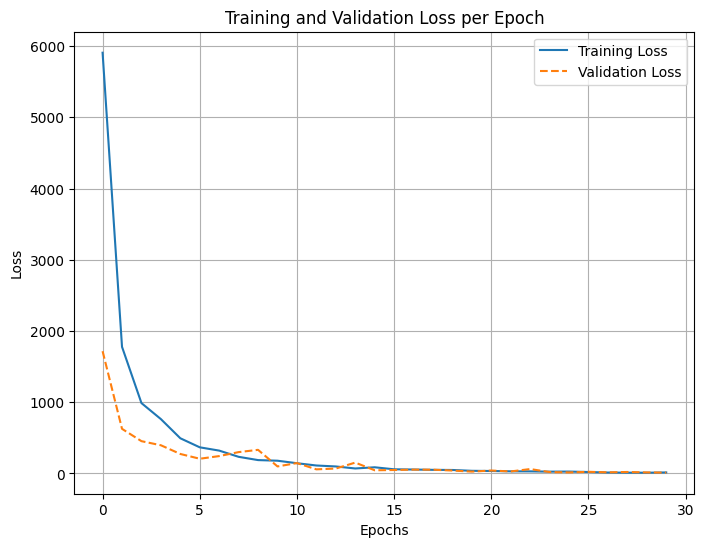

In [ ]:
# Assume 'history' is the object returned by model.fit()
# history.history contains the loss and accuracy metrics for each epoch

# Extract loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
plt.figure(figsize=(8,6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

##  Pushing the model to hugging face

In [ ]:
# Save the model using TensorFlow's SavedModel format
model.save('saved_model.keras')

In [ ]:
from huggingface_hub import Repository

# Clone the Hugging Face repository
repo = Repository(local_dir="ddos_detection_repo", clone_from="Sharukesh/ddos-detection-model")

# Move the .keras file to the repository directory
import shutil
shutil.move('/content/saved_model.keras', 'ddos_detection_repo/ddos_detection_model.keras')

# Push the model to Hugging Face
repo.push_to_hub(commit_message="Initial commit of DDoS detection model in .keras format")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/content/ddos_detection_repo is already a clone of https://huggingface.co/Sharukesh/ddos-detection-model. Make sure you pull the latest changes with `repo.git_pull()`.
Adding files tracked by Git LFS: ['ddos_detection_model.keras']. This may take a bit of time if the files are large.
To https://huggingface.co/Sharukesh/ddos-detection-model
   ddb8bbf..81ff863  main -> main

   ddb8bbf..81ff863  main -> main



'https://huggingface.co/Sharukesh/ddos-detection-model/commit/81ff863ac502a27e11cb39243e0cb7f0b3820552'

In [ ]:
print(merged_df.columns)

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 